# 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

In [130]:
# 필요한 모듈 import
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

In [131]:
# 데이터 준비
digits = load_digits() #digits 데이터 전체를 불러온다.
digits_data = digits.data #digits데이터의 data컬럼을 분류해 digits_data 변수에 담는다.
digits_label = digits.target #digits데이터의 target컬럼을 분류해 digits_label 변수에 담는다.

In [132]:
digits_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [133]:
digits_label

array([0, 1, 2, ..., 8, 9, 8])

In [134]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [135]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

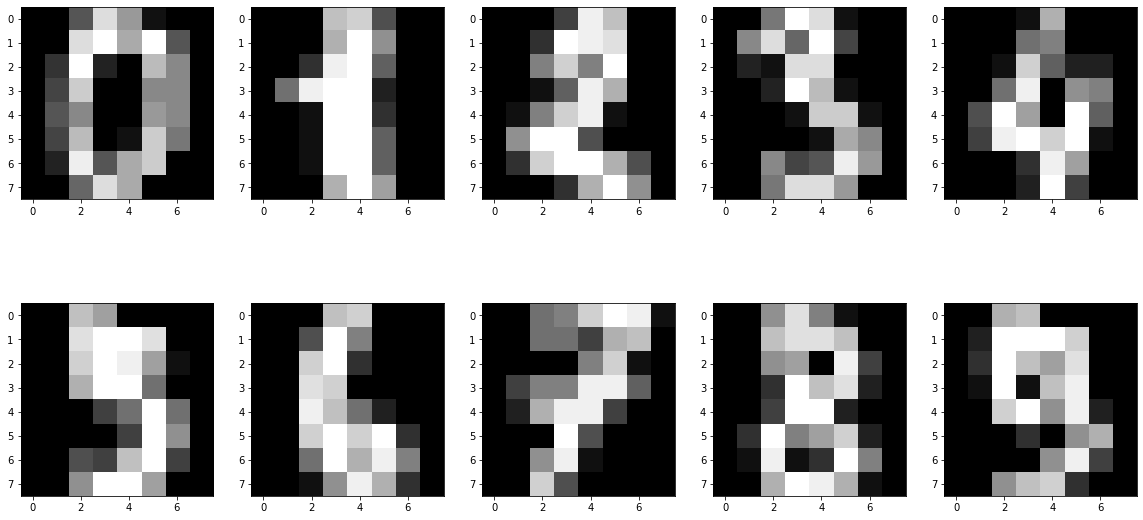

In [165]:
%matplotlib inline

samples = digits_data[:10].reshape(10, 8, 8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    axes[idx//5, idx%5].imshow(sample, cmap="gray")

In [136]:
# train, test 데이터 분리
#train_test_split()를 사용하여 X값, y값을 각각 train data와 test data로 나눈다. 함수에 들어 갈 파라미터로는 x,y가 들어가고
#test_size는 몇대몇으로 나눌지 정하는 옵션, random_state는 랜덤 패턴의 값을 지정한다.
X_train1, X_test1, y_train1, y_test1 = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=21) 

In [137]:
print('X_train1 개수: ', len(X_train1),', X_test1 개수: ', len(X_test1))
# len은 배열의 길이를 출력

X_train1 개수:  1437 , X_test1 개수:  360


In [138]:
X_train1.shape, y_train1.shape

((1437, 64), (1437,))

In [139]:
X_test1.shape, y_test1.shape

((360, 64), (360,))

In [140]:
y_train1, y_test1

(array([8, 0, 2, ..., 0, 5, 6]),
 array([6, 1, 1, 8, 4, 5, 5, 5, 0, 1, 4, 2, 6, 9, 2, 3, 8, 2, 3, 2, 8, 2,
        3, 5, 7, 5, 5, 7, 0, 3, 2, 7, 3, 6, 5, 4, 3, 7, 4, 7, 8, 9, 0, 3,
        9, 8, 0, 2, 5, 5, 8, 7, 6, 3, 5, 5, 2, 9, 0, 4, 2, 9, 8, 2, 4, 5,
        5, 2, 2, 8, 5, 3, 2, 3, 3, 0, 7, 1, 5, 4, 0, 0, 0, 8, 1, 8, 8, 3,
        0, 3, 0, 2, 3, 1, 4, 3, 4, 6, 8, 4, 5, 2, 3, 3, 1, 8, 0, 1, 5, 4,
        5, 4, 4, 1, 3, 0, 7, 0, 8, 5, 3, 6, 7, 6, 6, 3, 0, 0, 3, 7, 0, 2,
        5, 3, 2, 4, 0, 9, 9, 2, 5, 5, 8, 3, 5, 2, 3, 8, 8, 4, 2, 7, 9, 5,
        1, 6, 9, 2, 6, 1, 1, 4, 8, 0, 7, 7, 8, 1, 2, 5, 0, 7, 4, 7, 6, 7,
        5, 1, 9, 6, 3, 0, 5, 7, 6, 7, 2, 8, 4, 0, 1, 4, 1, 6, 7, 1, 8, 5,
        9, 0, 7, 7, 5, 3, 1, 9, 4, 2, 9, 5, 0, 9, 8, 7, 7, 4, 0, 8, 9, 6,
        5, 7, 7, 4, 4, 1, 6, 1, 6, 8, 8, 3, 0, 9, 5, 3, 7, 1, 3, 5, 1, 4,
        8, 0, 0, 6, 0, 8, 5, 6, 7, 6, 8, 5, 1, 9, 3, 6, 1, 9, 2, 8, 7, 6,
        2, 5, 2, 8, 4, 1, 5, 0, 3, 3, 8, 6, 1, 7, 6, 8, 4, 3, 1, 3, 7, 0,
     

###  Decision Tree

In [141]:
decision_tree = DecisionTreeClassifier(random_state=32) #결정트리분류기의 객체를 만든다.
decision_tree.fit(X_train1, y_train1) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred1_dt = decision_tree.predict(X_test1) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.

print(classification_report(y_test1, y_pred1_dt))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.93      0.72      0.81        36
           2       0.96      0.73      0.83        30
           3       0.74      0.83      0.78        41
           4       0.80      0.88      0.84        32
           5       0.90      0.93      0.91        46
           6       0.93      0.88      0.90        32
           7       0.90      0.93      0.91        40
           8       0.77      0.81      0.79        42
           9       0.69      0.76      0.72        29

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



### RandomForest

In [166]:
from sklearn.ensemble import RandomForestClassifier 

random_forest = RandomForestClassifier(random_state=32) # RandomForest분류기 객체를 생성
random_forest.fit(X_train1, y_train1) # 훈련

#random_forest 모델 객체의 feature_importances 속성을 사용하여 학습된 모델의 각 feature의 중요도를 계산합니다.
계산된 feature 중요도를 Pandas Series 객체로 변환하여 feature_importance 변수에 저장합니다.
random_forest.feature_importances_ #Feature Importance
feature_importance = pd.Series(random_forest.feature_importances_)
feature_importance.head(10)

0    0.000000
1    0.001815
2    0.018580
3    0.009832
4    0.009319
5    0.021115
6    0.008937
7    0.000996
8    0.000029
9    0.013658
dtype: float64

In [167]:
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance.head(10)

21    0.049617
36    0.046472
26    0.041638
43    0.038223
42    0.036511
28    0.035139
34    0.031537
30    0.029393
13    0.028714
20    0.028390
dtype: float64

<AxesSubplot:>

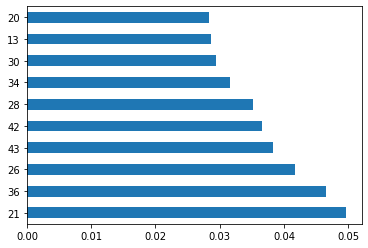

In [168]:
feature_importance.head(10).plot(kind="barh")

(-0.5, 7.5, 7.5, -0.5)

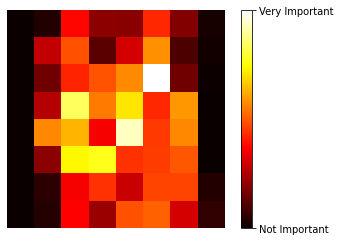

In [169]:
image = random_forest.feature_importances_.reshape(8, 8)
plt.imshow(image, cmap=plt.cm.hot, interpolation="nearest")
cbar = plt.colorbar(ticks=[random_forest.feature_importances_.min(), random_forest.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not Important', 'Very Important'])
plt.axis("off")

4

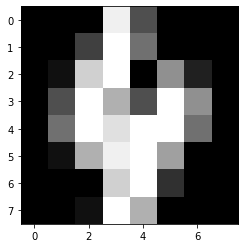

In [176]:
# train_pred = random_forest.predict(train_data)
# test_pred = random_forest.predict(test_data)

y_pred1_rf = random_forest.predict(X_test1) # 예측

plt.imshow(X_test1[4].reshape(8, 8), cmap="gray")
y_pred1_rf[4] 

In [177]:
print(classification_report(y_test1, y_pred1_rf)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        30
           3       0.98      0.98      0.98        41
           4       0.94      0.97      0.95        32
           5       1.00      0.98      0.99        46
           6       1.00      0.97      0.98        32
           7       0.98      1.00      0.99        40
           8       0.93      0.98      0.95        42
           9       1.00      0.93      0.96        29

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



### SVM

In [123]:
from sklearn import svm #Support Vector Machine을 사용하기 위해 import
svm_model = svm.SVC() 
svm_model.fit(X_train1, y_train1) # 훈련
y_pred1_svm = svm_model.predict(X_test1) # 예측

print(classification_report(y_test1, y_pred1_svm)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.98        32
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        40
           8       0.98      0.95      0.96        42
           9       1.00      0.93      0.96        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### SGD

In [125]:
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import
sgd_model = SGDClassifier() # 모델 객체 생성
sgd_model.fit(X_train1, y_train1) # sgd모델로 훈련데이터로 훈련시킨다.
y_pred1_sgd = sgd_model.predict(X_test1)# 그 모델로 test데이터를 사용해 예측

print(classification_report(y_test1, y_pred1_sgd)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.87      0.92      0.89        36
           2       1.00      0.93      0.97        30
           3       0.85      0.98      0.91        41
           4       1.00      0.97      0.98        32
           5       0.94      1.00      0.97        46
           6       1.00      1.00      1.00        32
           7       0.95      1.00      0.98        40
           8       0.97      0.83      0.90        42
           9       1.00      0.86      0.93        29

    accuracy                           0.95       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import
logistic_model = LogisticRegression() # 모델 객체 생성
logistic_model.fit(X_train1, y_train1) #LogisticRegression모델로 훈련데이터를 가지고 훈련시킨다.
y_pred1_lr = logistic_model.predict(X_test1) # 예측

print(classification_report(y_test1, y_pred1_lr)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        30
           3       0.98      1.00      0.99        41
           4       0.94      0.97      0.95        32
           5       0.98      0.98      0.98        46
           6       1.00      1.00      1.00        32
           7       0.97      0.97      0.97        40
           8       1.00      0.95      0.98        42
           9       0.96      0.93      0.95        29

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 평가

모델들의 예측결과를 비교하면 svm모델의 성능이 가장 좋다. 손글씨를 인식하는데에는 정확도가 좋다고 생각한다. 만약 데이터가 불균형 할 경우 재현율을 이용하면 좋다고 생각한다.

# 프로젝트 (2) load_wine : 와인을 분류해 봅시다

In [17]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [178]:
wine = load_wine() #wine 데이터 전체를 불러온다.
wine_data = wine.data #wine 데이터의 data컬럼을 분류해 wine_data 변수에 담는다.
wine_label = wine.target

In [179]:
wine_data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [180]:
wine_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [181]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [182]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [184]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=21) 

In [185]:
print('X_train2 개수: ', len(X_train2),', X_test2 개수: ', len(X_test2))
# len은 배열의 길이를 출력

X_train2 개수:  142 , X_test2 개수:  36


In [186]:
X_train2.shape, y_train2.shape

((142, 13), (142,))

In [187]:
X_test2.shape, y_test2.shape

((36, 13), (36,))

In [188]:
y_train2, y_test2

(array([2, 1, 2, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1,
        0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0,
        1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2,
        0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 2, 1, 1, 0, 0, 0]),
 array([0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2,
        2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2]))

### DecisionTree

In [189]:
decision_tree = DecisionTreeClassifier(random_state=32) #결정트리분류기의 객체를 만든다.
decision_tree.fit(X_train2, y_train2) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred2_dt = decision_tree.predict(X_test2) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.

print(classification_report(y_test2, y_pred2_dt))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.80      0.80      0.80        10
           2       0.89      0.73      0.80        11

    accuracy                           0.86        36
   macro avg       0.86      0.84      0.85        36
weighted avg       0.86      0.86      0.86        36



### Random forest

In [192]:
random_forest = RandomForestClassifier(random_state=32) # RandomForest분류기 객체를 생성
random_forest.fit(X_train2, y_train2) # 훈련
y_pred2_rf = random_forest.predict(X_test2) # 예측

print(classification_report(y_test2, y_pred2_rf)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### SVC

In [193]:
svm_model = svm.SVC() 
svm_model.fit(X_train2, y_train2) # 훈련
y_pred2_svm = svm_model.predict(X_test2) # 예측

print(classification_report(y_test2, y_pred2_svm)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.45      1.00      0.62        10
           2       0.00      0.00      0.00        11

    accuracy                           0.61        36
   macro avg       0.44      0.60      0.48        36
weighted avg       0.48      0.61      0.52        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SGD

In [56]:
sgd_model = SGDClassifier() # 모델 객체 생성
sgd_model.fit(X_train2, y_train2) # sgd모델로 훈련데이터로 훈련시킨다.
y_pred2_sgd = sgd_model.predict(X_test2)# 그 모델로 test데이터를 사용해 예측

print(classification_report(y_test2, y_pred2_sgd)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.00      0.00      0.00        10
           2       0.42      1.00      0.59        11

    accuracy                           0.58        36
   macro avg       0.47      0.56      0.46        36
weighted avg       0.55      0.58      0.52        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [58]:
logistic_model = LogisticRegression() # 모델 객체 생성
logistic_model.fit(X_train2, y_train2) #LogisticRegression모델로 훈련데이터를 가지고 훈련시킨다.
y_pred2_lr = logistic_model.predict(X_test2) # 예측

print(classification_report(y_test2, y_pred2_lr)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 평가


모델들의 예측결과를 비교하면 svm모델의 성능이 가장 좋다. 손글씨를 인식하는데에는 정확도가 좋다고 생각한다. 만약 데이터가 불균형 할 경우 재현율을 이용하면 좋다고 생각한다.

# 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

In [59]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [60]:
breast_cancer = load_breast_cancer() #iris 데이터 전체를 불러온다.
breast_cancer_data = breast_cancer.data #iris데이터의 data컬럼을 분류해 iris_data 변수에 담는다.
breast_cancer_label = breast_cancer.target

In [64]:
breast_cancer_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [65]:
breast_cancer_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [66]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [67]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [68]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7) 

In [69]:
print('X_train3 개수: ', len(X_train3),', X_test3 개수: ', len(X_test3))
# len은 배열의 길이를 출력

X_train3 개수:  455 , X_test3 개수:  114


In [70]:
X_train3.shape, y_train3.shape

((455, 30), (455,))

In [71]:
X_test3.shape, y_test3.shape

((114, 30), (114,))

In [72]:
y_train3, y_test3

(array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 

### Decision Tree

In [73]:
decision_tree = DecisionTreeClassifier(random_state=32) #결정트리분류기의 객체를 만든다.
decision_tree.fit(X_train3, y_train3) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred3_dt = decision_tree.predict(X_test3) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.

print(classification_report(y_test3, y_pred3_dt))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



### Random Forest

In [74]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(wine_data, # iris 데이터의 data 컬럼
                                                    wine_label, # iris 데이터의 target 컬럼
                                                    test_size=0.2, # test_size : train data와 test data를 몇대몇으로 나눌지 정하는 옵션
                                                    random_state=21) # random_state : 랜덤 패턴의 값을 지정

random_forest = RandomForestClassifier(random_state=32) # RandomForest분류기 객체를 생성
random_forest.fit(X_train3, y_train3) # 훈련
y_pred3_rf = random_forest.predict(X_test3) # 예측

print(classification_report(y_test3, y_pred3_rf)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### SVM

In [195]:
svm_model = svm.SVC() 
svm_model.fit(X_train3, y_train3) # 훈련
y_pred3_svm = svm_model.predict(X_test3) # 예측

print(classification_report(y_test3, y_pred3_svm)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.45      1.00      0.62        10
           2       0.00      0.00      0.00        11

    accuracy                           0.61        36
   macro avg       0.44      0.60      0.48        36
weighted avg       0.48      0.61      0.52        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SGD

In [76]:
sgd_model = SGDClassifier() # 모델 객체 생성
sgd_model.fit(X_train3, y_train3) # sgd모델로 훈련데이터로 훈련시킨다.
y_pred3_sgd = sgd_model.predict(X_test3)# 그 모델로 test데이터를 사용해 예측

print(classification_report(y_test3, y_pred3_sgd)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.28      1.00      0.43        10
           2       0.00      0.00      0.00        11

    accuracy                           0.28        36
   macro avg       0.09      0.33      0.14        36
weighted avg       0.08      0.28      0.12        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [77]:
logistic_model = LogisticRegression() # 모델 객체 생성
logistic_model.fit(X_train3, y_train3) #LogisticRegression모델로 훈련데이터를 가지고 훈련시킨다.
y_pred3_lr = logistic_model.predict(X_test3) # 예측

print(classification_report(y_test3, y_pred3_lr)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 평가
유방암은 False Nagative가 적어야되므로 재현율을 사용하는 방식이 맞다고 생각한다. 모델들의 성능을 비교하면 RandomForest가 제일 높다.

# 회고
작성자 : 이은영

### 이번 프로젝트를 하면서 어려웠던 점
이번 프로젝트는 저번 프로젝트에 비해 상대적으로 쉬운느낌이 들었으나 여전히 이론적으로는 어려운 부분이 많았습니다.
사이킷런에 내장된 분류 모델들을 학습시키고 예측까지 해보았는데 모델을 적용하여 결과를 내는건 쉬웠지만, 어떤 원리로 결론을 도출했는가에 대해서는 아직 공부가 조금 더 필요할 것 같습니다.


### 이번 프로젝트에서 학습한 내용
사이킷런을 활용한 머신러닝에 대해서 배웠습니다. 내장된 데이터로 지도학습 분류를 실습해 보았고 각 모델에 적용해보고 평가를 해보았습니다.


### 어려웠던 점
데이터셋에 따라 모델의 평가지표가 달라질 것인데 그걸 판단하는건 사람의 몫인것 같습니다. 평가지표를 판단하는 안목을 기르는 것이 필요한 능력이 아닐까 싶습니다.특히, label이 불균형하게 분포되어있는 데이터를 다룰 때는 더 조심해야한다고 하니, 해당 내용에 대해 조금 더 공부가 필요할 것 같습니다.


### 느낀점
머신러닝을 통해 이미지를 분류하는 실습을 해보았고, 해당 모델을 서치하던 중 feature의 중요도에 따라 어떤 feature가 예측에 가장 중요한 역할을 하는지 파악할 수 있다는 사실을 알았습니다. 노드에 없던 내용이기도 했고 서치하면서 알아가는 것도 나름 재밌고 유익한 것 같습니다.